# Basic Measurement For Quantum Features

In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram
import numpy as np
sim = Aer.get_backend('aer_simulator')

## State Initialization

#### Requests:
    1. The length should be 2^(input bits)
    2. The sum of absolute values of each bit should equal to 1.

#### Physical Significance
    Each element in the initialization vector represents the wave function of each state

#### Further Design Pattern
    * Create a initialization vector first
    * Only take qubit argument

## Single Bit Circuit

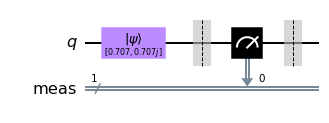

In [2]:
# single bit initialization

cir_sigbit = QuantumCircuit(1)
cir_sigbit.initialize([np.cos(np.pi/4), 1j*np.sin(np.pi/4)], cir_sigbit.qubits)
"""
The .initialization method takes (qubit, cbit)
Assign cbit to qubit
"""
cir_sigbit.measure_all()
cir_sigbit.save_statevector()
cir_sigbit.draw(output ='mpl')

In [3]:
'''
Equivalent Code:

cir_sigbit = QuantumCircuit(1, 1)
cir_sigbit.initialize([np.cos(np.pi/4), 1j*np.sin(np.pi/4)], 0)
"""
The .initialization method takes (qubit, cbit)
Assign cbit to qubit
"""
cir_sigbit.measure(0,0)
cir_sigbit.draw(output ='mpl')

'''

'\nEquivalent Code:\n\ncir_sigbit = QuantumCircuit(1, 1)\ncir_sigbit.initialize([np.cos(np.pi/4), 1j*np.sin(np.pi/4)], 0)\n"""\nThe .initialization method takes (qubit, cbit)\nAssign cbit to qubit\n"""\ncir_sigbit.measure(0,0)\ncir_sigbit.draw(output =\'mpl\')\n\n'

In [4]:
# Adding statevector measurement
qobj = assemble(cir_sigbit)
state = sim.run(qobj).result().get_statevector()
print("State of Measured Qubit = " + str(state))


State of Measured Qubit = Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


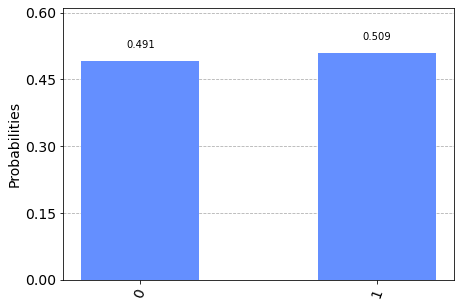

In [5]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(cir_sigbit).result()
counts = result.get_counts()
plot_histogram(counts)

## 2-bit Q-Circuit

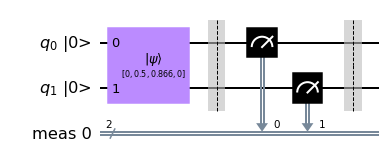

In [6]:
circuit2 = QuantumCircuit(2)
circuit2.initialize([0, 1/2, np.sqrt(3)/2, 0], circuit2.qubits)
circuit2.measure_all()
circuit2.save_statevector()
circuit2.draw(output = 'mpl', initial_state=True)

In [7]:
# Adding statevector measurement
qobj = assemble(circuit2)
state = sim.run(qobj).result().get_statevector()
print("State of Measured Qubit = " + str(state))

State of Measured Qubit = Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
            dims=(2, 2))


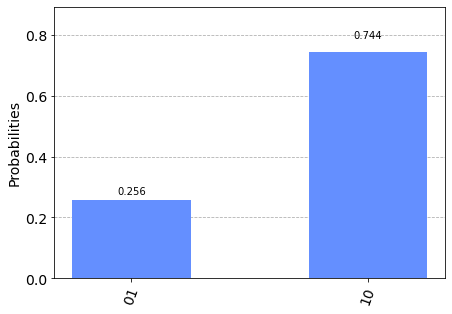

In [8]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(circuit2).result()
counts = result.get_counts()
plot_histogram(counts)

## 2-bit Q-Circuit with equal probability

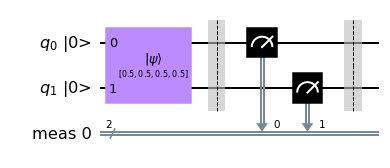

In [9]:
circuit3 = QuantumCircuit(2)
circuit3.initialize([0.5, 0.5, 0.5, 0.5], circuit3.qubits)
'''
P(oo)=P(01)=P(10)=P(11)
'''
circuit3.measure_all()
circuit3.save_statevector()
circuit3.draw(output = 'mpl', initial_state=True)

In [10]:
# Adding statevector measurement
qobj = assemble(circuit3)
state = sim.run(qobj).result().get_statevector()
print("State of Measured Qubit = " + str(state))

State of Measured Qubit = Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
            dims=(2, 2))


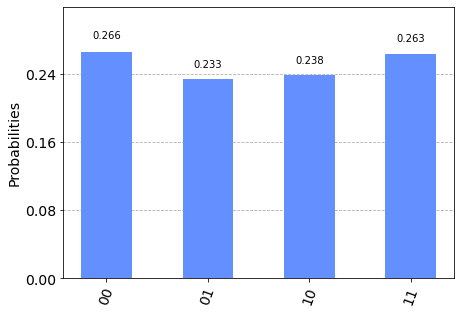

In [11]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(circuit3).result()
counts = result.get_counts()
plot_histogram(counts)